#BGSA - JPG

In [56]:
import os
import numpy as np
from PIL import Image 
from scipy.misc import *
#from argparse import ArgumentParser
from bgsa_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
 #!git clone https://github.com/dridk/bgsa-ndpi

In [58]:

file_path = 'gland_86_2.jpg'

In [59]:
from ipywidgets import widgets

In [60]:
def on_button_clicked(b):
  print('Begin of calculation...')
  brightness = inputBrightness
  contrast = inputContrast
  hue = inputHue
  saturation = inputSaturation
  

In [61]:
# displaying the text widget
inputBrightness = widgets.Text(description="Brightness", width=50, value=str(-100))
display(inputBrightness)

inputContrast = widgets.Text(description="Contrast", width=50, value=str(300))
display(inputContrast)

inputHue = widgets.Text(description="Hue", width=50, value=str(-90))
display(inputHue)

inputSaturation = widgets.Text(description="Saturation", width=50, value=str(0.65))
display(inputSaturation)

button = widgets.Button(description = 'Calculate!')
display(button)

button.on_click(on_button_clicked)

Text(value='-100', description='Brightness')

Text(value='300', description='Contrast')

Text(value='-90', description='Hue')

Text(value='0.65', description='Saturation')

Button(description='Calculate!', style=ButtonStyle())

In [62]:
np.uint8(int(inputBrightness.value)).dtype

dtype('uint8')

## get_red

In [63]:
im = Image.open(os.path.join(os.getcwd(), file_path), mode='r')  

In [64]:
red_im = get_red(im)

(-0.5, 1279.5, 799.5, -0.5)

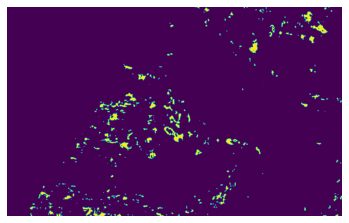

In [65]:
plt.imshow(red_im)
plt.axis('off')

## get_brown

In [66]:
brown_im = get_brown(im)

(-0.5, 1279.5, 799.5, -0.5)

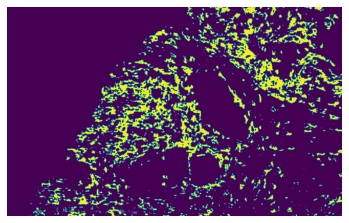

In [67]:
plt.imshow(brown_im)
plt.axis('off')

## get_white_pixels

In [68]:
brown_pix = get_white_pixels(brown_im)
red_pix = get_white_pixels(red_im)

In [69]:
print(brown_pix)
print(red_pix)

133418
25618


#BGSA - NDPI


In [11]:
!apt-get install openslide-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (184 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 146456 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2_amd64.deb ...
Unpacking libopenslide0 (3.4.1+dfsg-2) ...
Selecting previously unselected package openslide-tools.
Preparing to unpack 

In [12]:
 !pip  install openslide-python

     |████████████████████████████████| 317kB 4.1MB/s 
  Created wheel for openslide-python: filename=openslide_python-1.1.2-cp36-cp36m-linux_x86_64.whl size=26714 sha256=6da8b245f206c46497a9c1c320c62dee1185a52efc407cfa581807c8c391ba5b
  Stored in directory: /root/.cache/pip/wheels/6b/55/74/ba9d3dcc2c5c0f1282e08bae70df0ed57b496fb6b5c8f1adc9
Successfully built openslide-python


In [13]:
from openslide import OpenSlide
import zipfile


In [14]:
!wget http://openslide.cs.cmu.edu/download/openslide-testdata/Mirax/CMU-1-Saved-1_16.zip

--2021-02-03 09:48:55--  http://openslide.cs.cmu.edu/download/openslide-testdata/Mirax/CMU-1-Saved-1_16.zip
Resolving openslide.cs.cmu.edu (openslide.cs.cmu.edu)... 128.2.209.93
Connecting to openslide.cs.cmu.edu (openslide.cs.cmu.edu)|128.2.209.93|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3754715 (3.6M) [application/zip]
Saving to: ‘CMU-1-Saved-1_16.zip’

CMU-1-Saved-1_16.zi 100%[===================>]   3.58M  1.82MB/s    in 2.0s    

2021-02-03 09:48:57 (1.82 MB/s) - ‘CMU-1-Saved-1_16.zip’ saved [3754715/3754715]



In [15]:
with zipfile.ZipFile("CMU-1-Saved-1_16.zip","r") as zip_ref:
    zip_ref.extractall("test_mrxs")

In [31]:
split = 2
level = 3

In [32]:
ndpi         = OpenSlide('/content/test_mrxs/CMU-1-Saved-1_16.mrxs')
ndpi_width   = ndpi.dimensions[0]
ndpi_height  = ndpi.dimensions[1]
total_width  = ndpi.level_dimensions[level][0]
total_height = ndpi.level_dimensions[level][1]

In [28]:
red_sum     = 0.0
brown_sum   = 0.0
surface_sum = 0.0

0 0
0 1
1 0
1 1


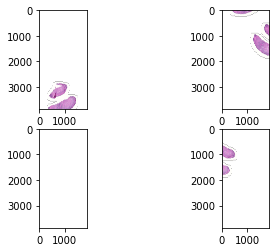

In [29]:

fig, axs = plt.subplots(split,split)
for i in range(split):
    for j in range(split):
        x     = i * round(ndpi_width / split)
        y     = j * round(ndpi_height / split)
        w     = round(total_width / split)
        h     = round(total_height / split)
        
        region  = ndpi.read_region((x,y), level, (w, h))
        print(str(i)+' '+str(j))
        axs[i, j].imshow(region)
        red     = get_red(region)
        brown   = get_brown(region)

        red_sum    += get_white_pixels(red)
        brown_sum  += get_white_pixels(brown)   


In [21]:
print(red_sum)
print(brown_sum)

5575.0
2.0


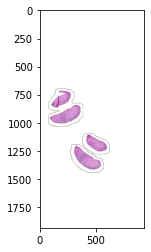

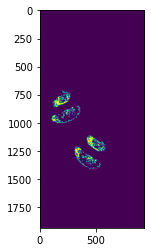

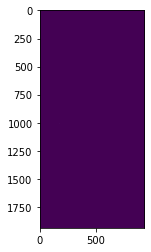

In [33]:
x     = 0
y     = 0
w     = round(total_width-1)
h     = round(total_height-1)

region  = ndpi.read_region((x,y), level, (w, h))
plt.figure()
plt.imshow(region)

red     = get_red(region)
plt.figure()
plt.imshow(red)

brown   = get_brown(region)
plt.figure()
plt.imshow(brown)
